What is the fuel consumption (L/100k) rate for the diesel car?
Import Data:
https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [1]:
import pandas as pd
import matplotlib.pylab as plt 

#This function will download the dataset into your browser 
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [2]:
# download the dataset into your local machine
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

Reading the dataset from the URL and adding the related headers

In [3]:
# assign URL of the dataset to "filename"
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

# create a Python list headers containing name of headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
            "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
            "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
            "peak-rpm","city-mpg","highway-mpg","price"]

you will need to download the dataset; if you are running locally, please comment out the following
await download(filename, "auto.csv")
filename="auto.csv"

In [4]:
# Use Pandas method read_csv() to load the data from the web address
# set the parameter "names" equal to the Python list "headers"

df = pd.read_csv(filename, names=headers)

# Use the method head() to display the first five rows of the dataframe

print(df.head())

# several question marks appear in the dataframe which corresponds to missing data hindering further analysis

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

Steps for working with missing data:

1. Identify missing data
2. Deal with missing data
3. Correct data format

I. Identify missing values:

Converting "?" to NaN

In [5]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace=True)
print(df.head(5))

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

Evaluating for Missing Data
The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

1. .isnull()
2. .notnull()
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [6]:
missing_data = df.isnull()
print(missing_data.head(5))
# "True" means the value is a missing value while "False" means the value is not a missing value.

   symboling  normalized-losses   make  fuel-type  aspiration  num-of-doors  \
0      False               True  False      False       False         False   
1      False               True  False      False       False         False   
2      False               True  False      False       False         False   
3      False              False  False      False       False         False   
4      False              False  False      False       False         False   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0       False         False            False       False  ...        False   
1       False         False            False       False  ...        False   
2       False         False            False       False  ...        False   
3       False         False            False       False  ...        False   
4       False         False            False       False  ...        False   

   fuel-system   bore  stroke  compression-ratio  horsep

Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" and "False" values.

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

II. Deal with Missing data
How to deal with missing data?
Drop data
a. Drop the whole row
b. Drop the whole column
Replace data
a. Replace it by mean
b. Replace it by frequency
c. Replace it based on other functions

Replace by mean:
"normalized-losses": 41 missing data, replace them with mean
"stroke": 4 missing data, replace them with mean
"bore": 4 missing data, replace them with mean
"horsepower": 2 missing data, replace them with mean
"peak-rpm": 2 missing data, replace them with mean

Replace by frequency:
"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur
Drop the whole row:
"price": 4 missing data, simply delete the whole row
Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

In [13]:
# Calculate the mean value for the "normalized-losses" column
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses: ", avg_norm_loss)
# Replace "NaN" with mean value in "normalized-losses" column
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
print(df["normalized-losses"])

Average of normalized-losses:  122.0
0      122.0
1      122.0
2      122.0
3        164
4        164
       ...  
200       95
201       95
202       95
203       95
204       95
Name: normalized-losses, Length: 205, dtype: object


In [14]:
# Calculate the mean value for the "bore" column
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of bore:", avg_bore)
# Replace "NaN" with the mean vlaue in the "bore" column
df["bore"].replace(np.nan, avg_bore, inplace=True)
print(df["bore"])

Average of bore: 3.3297512437810943
0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object


Question #1: 
Based on the example above, replace NaN in "stroke" column with the mean value.

In [16]:
# Calculate the mean value for the "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)
# replace "NaN" with the mean value in the "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
print(df["stroke"])

Average of stroke: 3.2554228855721394
0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: object


In [17]:
# Calculate the mean value for the "horsepower" column
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("Average of horsepower:", avg_horsepower)
# replace "NaN" with the mean value in the "stroke" column
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
print(df["horsepower"])

Average of horsepower: 104.25615763546799
0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object


In [19]:
# Calculate the mean value for the "peak-rpm" column
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)
print("Average of peak-rpm:", avg_peak_rpm)
# replace "NaN" with the mean value in the "stroke" column
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)
print(df["peak-rpm"])

Average of peak-rpm: 5125.369458128079
0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object


In [20]:
# To see which values are present in a particular column, we can use the ".value_counts()" method:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [22]:
# We can also use the ".idxmax()" method to calculate the most common type automatically:
df['num-of-doors'].value_counts().idxmax()

'four'

In [23]:
# replace "NaN" with the value by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace=True)
print(df["num-of-doors"])

0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object


In [24]:
# drop whole row with "NaN" price column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index since we dropped two rows
df.reset_index(drop=True, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


III. Correct Data Format
The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In Pandas we use:
.dtype() - to check the data type
.astype() - to change the data type

In [26]:
# List of data types for each column
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [27]:
# Convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

DATA STANDARDIZATION / Data Formatting

Assuming we are developing an application in a country that accepts the fuel consumption with L/100km standard, transform city-mpg.

unit convertion:
L/100km = 235 / mpg

In [28]:
# use Pandas
df.head()

# Convert mpg to L/100kmby mathemtical operation (235 divided by mpg)
df["city-L/100km"] = 235 / df["city-mpg"]

# check your transformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [29]:
# transform mpg to L/100km in the column of "highway-mpg" and change the name of the column to "highway-L/100km"

df["highway-mpg"] = 235 / df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check tranformed data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


DATA NORMALIZATION
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [30]:
df[["length", "width", "height"]].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [32]:
# normalize the column "length", "width" and "height"
df["height"] = df["height"] / df["height"].max()
df["width"] = df["width"] / df["width"].max()
df["length"] = df["length"] / df["length"].max()

df[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


DATA BINNING
What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower
(3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

In [33]:
# Convert data to correct format:
df["horsepower"] = df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

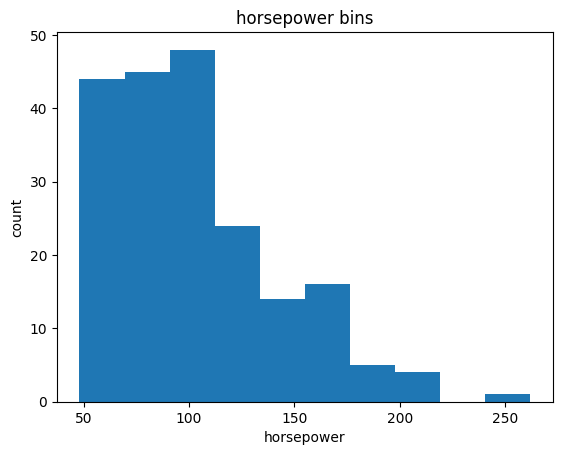

In [34]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).

Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

In [35]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [37]:
# Set group names;
group_names = ["Low", "Medium", "High"]

In [38]:
# Apply function "cut" to determine what each value of df['horsepower] belongs to.

df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels = group_names, include_lowest=True)
df[["horsepower", "horsepower-binned"]].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [39]:
# let's see the number of vehices in each bin:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

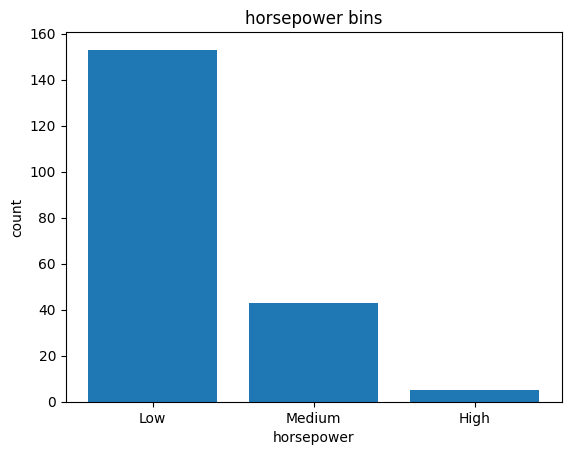

In [40]:
# Let's plot the distribution of each bin:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labelts and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'hosepower bins')

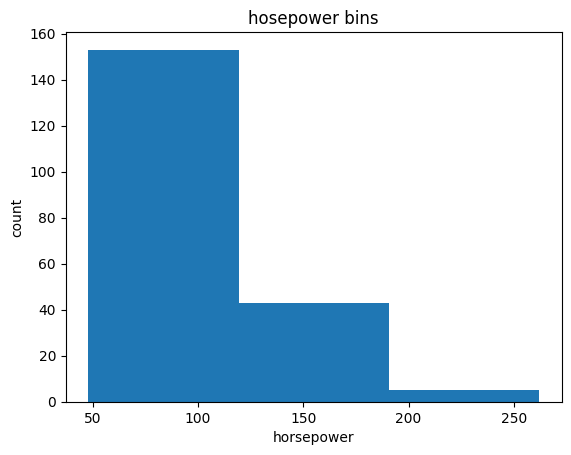

In [44]:
# Bins Visualization
# Normally, a histogram is used to Visualize the distribution of bins we created above.

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("hosepower bins")

Indicator Variable(or Dummy Variable)
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because
the numbers themselves don't have inherent meaning.

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

Regression doesn't understand words, only numbers

We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type.

In [45]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [53]:
# Get the indicator variables and assign it to data frame "dummy_variable_1":
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [54]:
# Change the column names for clarity:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [55]:
# In the dataframe, column 'fuel-type' has values for 'gas' and 'diesel' as 0s and 1s now
df = pd.concat([df, dummy_variable_1], axis=1)
df.head()
# drop original column "fuel-type" from "df"

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,False,True
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,False,True
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,False,True
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,False,True
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,False,True


In [60]:
# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,False,True


In [62]:
# Indicator Variable for the column "aspiration"

dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [63]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop("aspiration", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,13495.0,11.190476,Low,False,True,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,16500.0,11.190476,Low,False,True,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.038462,16500.0,12.368421,Medium,False,True,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,7.833333,13950.0,9.791667,Low,False,True,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,10.681818,17450.0,13.055556,Low,False,True,False,True,True,False


In [ ]:
# Save the new csv:
# csv file cannot be viewed in jupyterlite
df.to_csv('clean_UsedCarsPricing_df.csv')